In [34]:
from langchain_groq import ChatGroq
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

In [3]:
llm = ChatGroq(model = "qwen/qwen3-32b", groq_api_key = "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")

In [7]:
wiki_api = WikipediaAPIWrapper(top_k_reuslts = 1, doc_content_chars_max = 500)
arxiv_api = ArxivAPIWrapper(top_k_results = 1, doc_content_chars_max = 500)

wikipedia = WikipediaQueryRun(api_wrapper = wiki_api)
arxiv = ArxivQueryRun(api_wrapper = arxiv_api)

tavily = TavilySearchResults(max_results = 1, tavily_api_key = "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")

tools = [wikipedia, arxiv, tavily]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22888\36251999.py:7: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults(max_results = 1, tavily_api_key = "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")


In [8]:
llm_with_tools = llm.bind_tools(tools)

In [20]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [21]:
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [30]:
builder = StateGraph(State)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

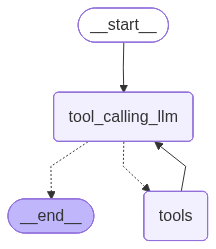

In [31]:
graph

In [37]:
def get_response(query):
    messages = graph.invoke({"messages": query})
    for m in messages["messages"]:
        m.pretty_print()

In [38]:
print(get_response("What is AI?"))

================================ Human Message =================================

What is AI?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (zn0fj22ra)
 Call ID: zn0fj22ra
  Args:
    query: Artificial Intelligence
================================= Tool Message =================================
Name: wikipedia

Page: Artificial intelligence
Summary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goal
================================== Ai Message ==================================

Artificial Intelligence (AI) refers to the ab

In [39]:
print(get_response("What is the recent researches about natural language processing in 2025?"))

================================ Human Message =================================

What is the recent researches about natural language processing in 2025?
================================== Ai Message ==================================
Tool Calls:
  arxiv (vkf89z107)
 Call ID: vkf89z107
  Args:
    query: recent advances in natural language processing 2025
================================= Tool Message =================================
Name: arxiv

Published: 2025-04-09
Title: Integrating Cognitive Processing Signals into Language Models: A Review of Advances, Applications and Future Directions
Authors: Angela Lopez-Cardona, Sebastian Idesis, Ioannis Arapakis
Summary: Recently, the integration of cognitive neuroscience in Natural Language
Processing (NLP) has gained significant attention. This article provides a
critical and timely overview of recent advancements in leveraging cognitive
signals, particularly Eye-tracking (ET) signals, to e
================================== Ai Message 

In [40]:
print(get_response("What is the price of bitcoin today?"))

================================ Human Message =================================

What is the price of bitcoin today?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (4e0fv4qr6)
 Call ID: 4e0fv4qr6
  Args:
    query: current price of bitcoin
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Bitcoin price today, BTC to USD live price, marketcap and chart", "url": "https://coinmarketcap.com/currencies/bitcoin/", "content": "The live Bitcoin price today is $115,563 USD with a 24-hour trading volume of $22,956,032,708 USD. We update our BTC to USD price in real-time. Bitcoin is down 0.52% in the last 24 hours. The current CoinMarketCap ranking is #1, with a live market cap of $2,302,400,554,256 USD. It has a circulating supply of 19,923,296 BTC coins and a max. supply of 21,000,000 BTC coins. [...] Thanks to its pioneering nature, BTC remain

In [42]:
print(get_response("Hi, how are you?"))

================================ Human Message =================================

Hi, how are you?
================================== Ai Message ==================================

I'm an AI developed by Alibaba Cloud, and I don't have feelings, but I'm here to help you! How can I assist you today?
None
